In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("1_Preprocessed_Dataset.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(918, 12)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.638344,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    int64  
 2   cp        918 non-null    int64  
 3   trestbps  918 non-null    int64  
 4   chol      918 non-null    int64  
 5   fbs       918 non-null    int64  
 6   restecg   918 non-null    int64  
 7   thalach   918 non-null    int64  
 8   exang     918 non-null    int64  
 9   oldpeak   918 non-null    float64
 10  slope     918 non-null    int64  
 11  target    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [8]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
329,60,1,4,130,0,1,1,130,1,1.1,3,1
538,54,1,4,130,202,1,0,112,1,2.0,2,1
102,40,0,4,150,392,0,0,130,0,2.0,2,1
70,57,1,2,140,265,0,1,145,1,1.0,2,1
688,76,0,3,140,197,0,1,116,0,1.1,2,0


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
target      0
dtype: int64

In [10]:
data.isnull().sum().sum()

0

In [11]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
slope       0.558771
exang       0.494282
cp          0.471354
oldpeak     0.403951
thalach     0.400421
sex         0.305445
age         0.282039
fbs         0.267291
chol        0.232741
trestbps    0.107589
restecg     0.061011
Name: target, dtype: float64


# Exploratory Data Analysis (EDA)

In [12]:
y = data["target"]

1    508
0    410
Name: target, dtype: int64


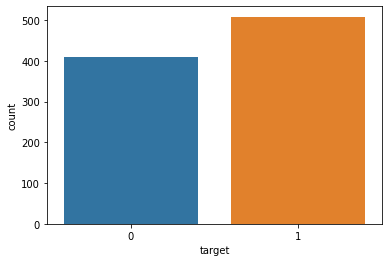

In [13]:
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)

In [14]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/918,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/918,2)))

Percentage of patience without heart problems: 44.66
Percentage of patience with heart problems: 55.34


In [15]:
data["sex"].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='target'>

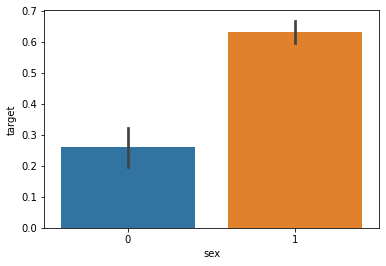

In [16]:
sns.barplot(data["sex"],data["target"])

In [17]:
def plotAge():
    facet_grid = sns.FacetGrid(data, hue='target')
    facet_grid.map(sns.kdeplot, "age", shade=True, ax=axes[0])
    legend_labels = ['disease false', 'disease true']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel='age', ylabel='density')

    avg = data[["age", "target"]].groupby(['age'], as_index=False).mean()
    sns.barplot(x='age', y='target', data=avg, ax=axes[1])
    axes[1].set(xlabel='age', ylabel='disease probability')

    plt.clf()

### Here 0 is female and 1 is male patients

In [18]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:21.02%
Percentage of Male Patients:78.98%


In [19]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping'])]

In [20]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [21]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


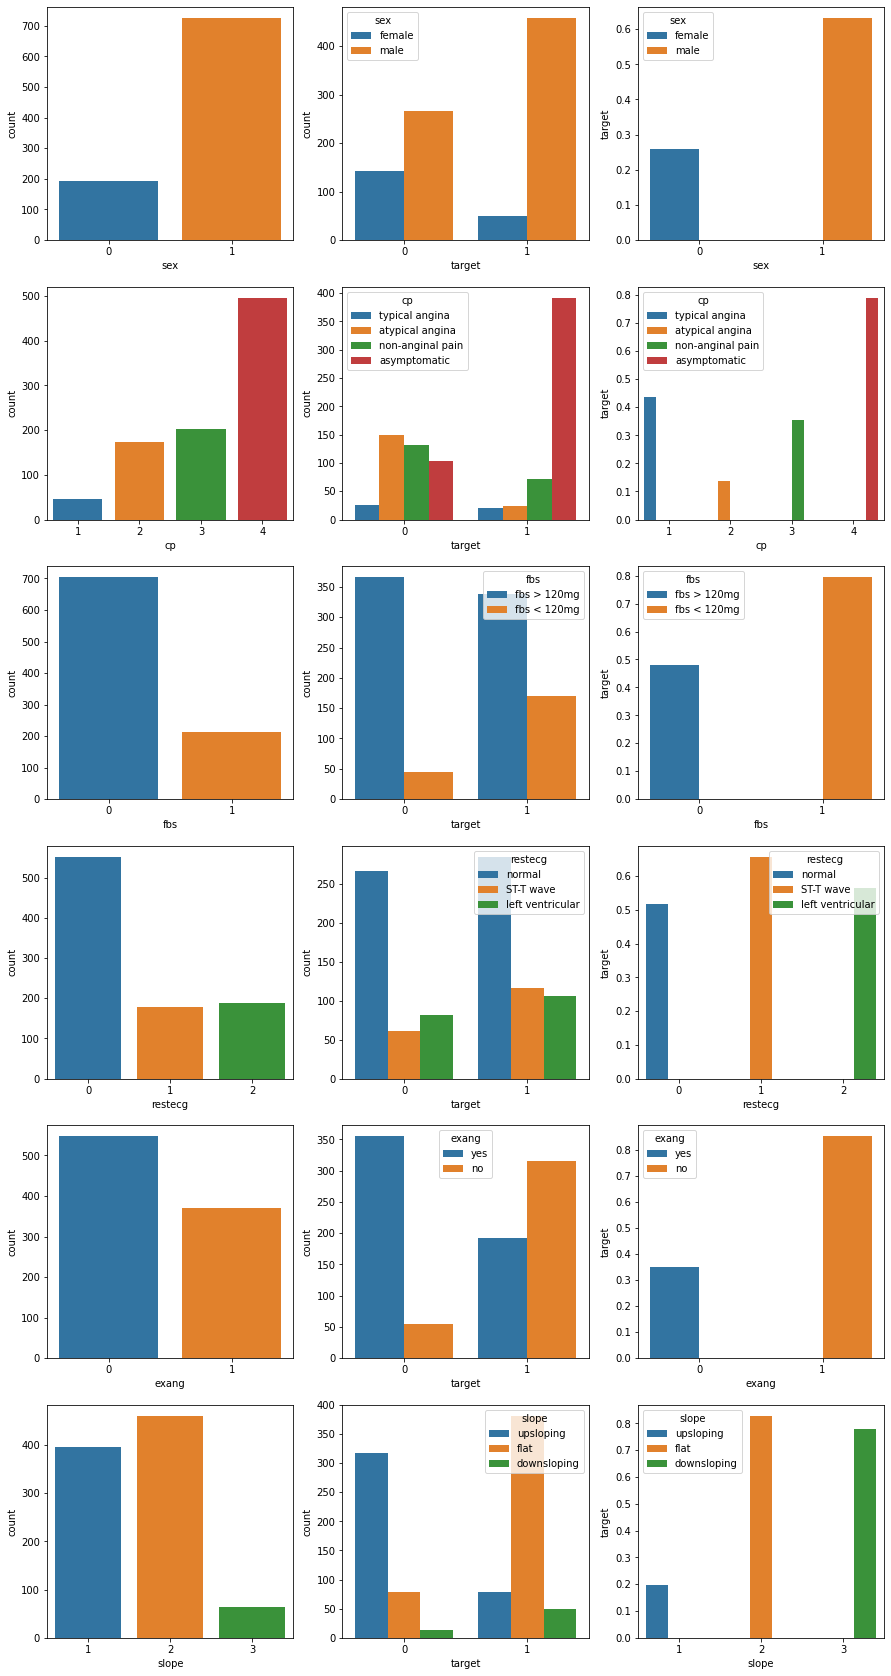

In [22]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [23]:
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'),  
              ('oldpeak', 'ST depression by exercise relative to rest')]

In [24]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

# Heart Disease Frequency for ages

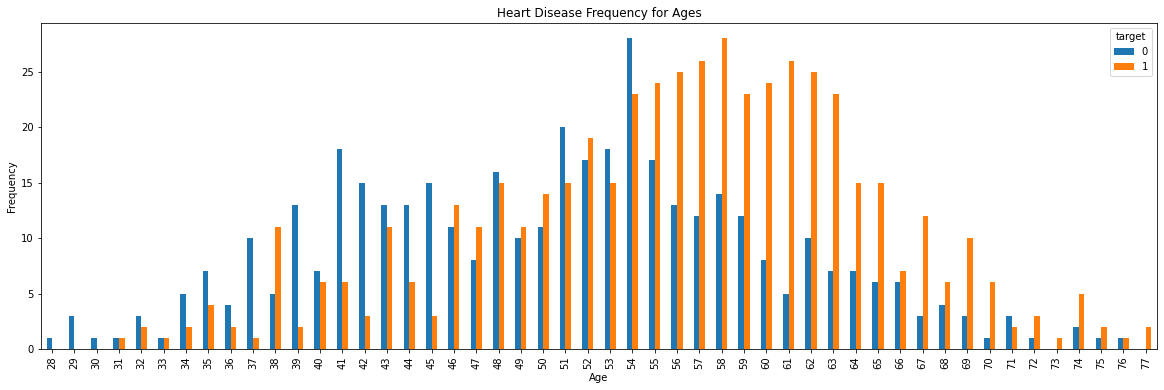

In [25]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

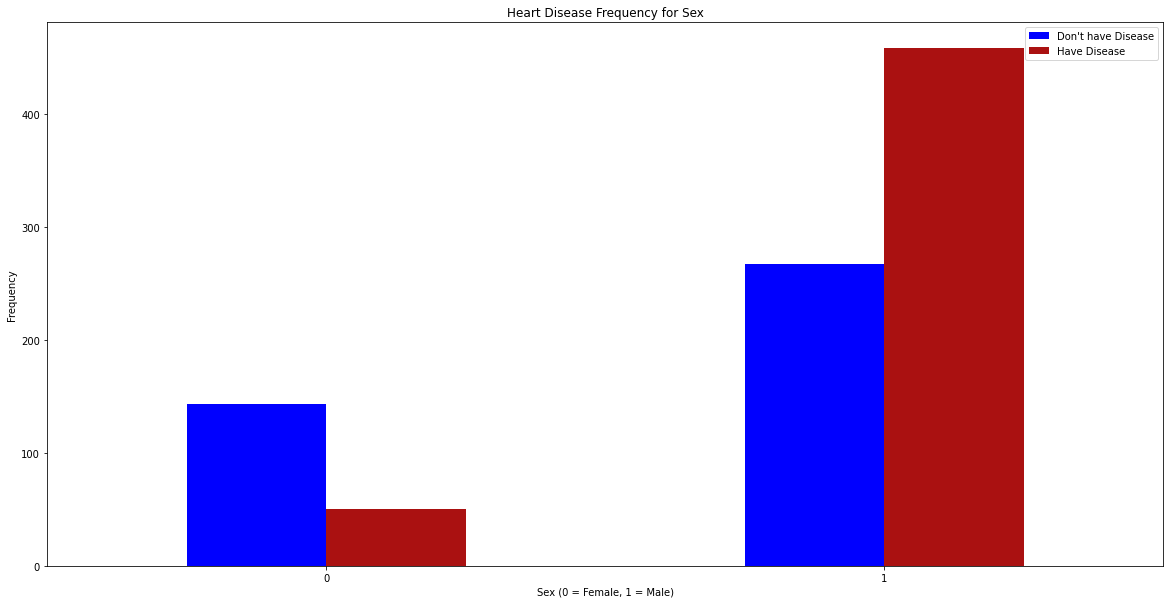

In [26]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

run this line after prediction

In [27]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'target']

In [28]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


# Correlation plot

In [29]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression',]

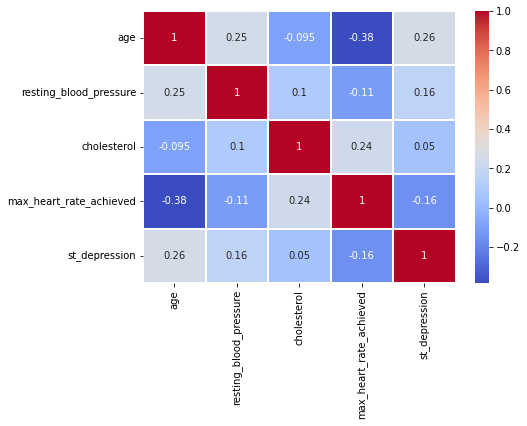

In [30]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

##Correlation analysis

In [31]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
913,45,110,264,132,1.2
914,68,144,193,141,3.4
915,57,130,131,115,1.2
916,57,130,236,174,0.0


# Splitting the dataset to Train and Test

In [32]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 734 records and Testing features have 184 records.


In [33]:
X_train.shape

(734, 11)

In [34]:
X_test.shape

(184, 11)

In [35]:
Y_train.shape

(734,)

In [36]:
Y_test.shape

(184,)

## importing Accuracy score

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

# Logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1]


In [40]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 83.15 %


In [41]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 85.83%
Test accuracy: 83.15%


# Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
matrix= confusion_matrix(Y_test, y_pred_lr)

<AxesSubplot:>

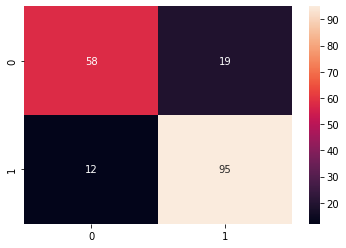

In [44]:
sns.heatmap(matrix,annot = True, fmt = "d")

fmt = d is format = default

# precision Score

In [45]:
from sklearn.metrics import precision_score

In [46]:
precision = precision_score(Y_test, y_pred_lr)

In [47]:
print("Precision: ",precision)

Precision:  0.8333333333333334


# Recall

In [48]:
from sklearn.metrics import recall_score

In [49]:
recall = recall_score(Y_test, y_pred_lr)

In [50]:
print("Recall is: ",recall)

Recall is:  0.8878504672897196




---



# F-Score

balance of precision and recall score

In [51]:
print((2*precision*recall)/(precision+recall))

0.8597285067873303


cm using bad style

In [52]:
CM =pd.crosstab(Y_test, y_pred_lr)
CM

col_0,0,1
target,,
0,58,19
1,12,95


In [53]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

false negative

In [54]:
fnr=FN*100/(FN+TP)
fnr

11.214953271028037

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1
 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1]


# Learning curve for Training score & cross validation score

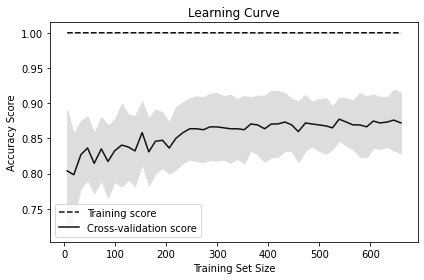

In [56]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train, 
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [57]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 84.24 %


In [58]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.842


Now, let us prune the depth of trees and check the accuracy.

In [59]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.875
Accuracy on test set: 0.837


performance metrics
-Accuracy: is the ratio between the number of correct predictions and total number of predications.

$acc = \frac{TP + TN}{TP + TN + FP + FN}$

-Precision: is the ratio between the number of correct positives and the number of true positives plus the number of false positives.

$Precision (p) = \frac{TP}{TP + FP}$

-Recall: is the ratio between the number of correct positives and the number of true positives plus the number of false negatives.

$recall = \frac{TP}{TP + FN}$

-F-score: is known as the harmonic mean of precision and recall.

$acc = \frac{1}{\frac{1}{2}(\frac{1}{p}+\frac{1}{r})} = \frac{2pr}{p+r}$

-Problem characteristics in context of our case study:

TP = True positive (has heart disease). TN = True negative (has no heart disease). FP = False positive (has no heart disease) FN = False negative (has heart disease)

## confusion matrix of Random Forest

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
matrix= confusion_matrix(Y_test, y_pred_rf)

<AxesSubplot:>

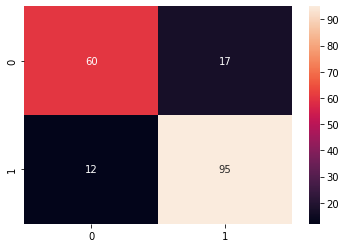

In [62]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [63]:
from sklearn.metrics import precision_score

In [64]:
precision = precision_score(Y_test, y_pred_rf)

In [65]:
print("Precision: ",precision)

Precision:  0.8482142857142857


# recall

In [66]:
from sklearn.metrics import recall_score

In [67]:
recall = recall_score(Y_test, y_pred_rf)

In [68]:
print("Recall is: ",recall)

Recall is:  0.8878504672897196


# F score

In [69]:
print((2*precision*recall)/(precision+recall))

0.8675799086757991


### cm using bad style

In [70]:
CM =pd.crosstab(Y_test, y_pred_rf)
CM

col_0,0,1
target,,
0,60,17
1,12,95


In [71]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## False negative rate of the model

In [72]:
fnr=FN*100/(FN+TP)
fnr

11.214953271028037

# Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 85.42%
Test accuracy: 83.15%
[1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1
 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1]


In [74]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 83.15 %


In [75]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 85.42%
Test accuracy: 83.15%


## confusion matrix of Naive Bayes

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
matrix= confusion_matrix(Y_test, y_pred_nb)

<AxesSubplot:>

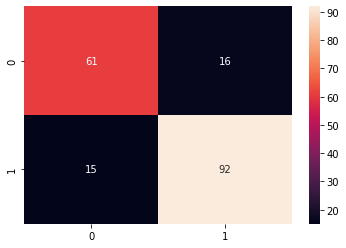

In [78]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [79]:
from sklearn.metrics import precision_score

In [80]:
precision = precision_score(Y_test, y_pred_nb)

In [81]:
print("Precision: ",precision)

Precision:  0.8518518518518519


# recall

In [82]:
from sklearn.metrics import recall_score

In [83]:
recall = recall_score(Y_test, y_pred_nb)

In [84]:
print("Recall is: ",recall)

Recall is:  0.8598130841121495


# f score

In [85]:
print((2*precision*recall)/(precision+recall))

0.8558139534883722


### bad cm style

In [86]:
CM = pd.crosstab(Y_test, y_pred_nb)
CM

col_0,0,1
target,,
0,61,16
1,15,92


In [87]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [88]:
fnr = FN*100/(FN+TP)
fnr

14.018691588785046

# KNN(K Nearest Neighbors)

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 75.61%
Test accuracy: 69.57%
[1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1
 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1]


In [90]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 69.57 %


In [91]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 78.61%
Test accuracy: 69.02%


Let's see if KNN can perform even better by trying different 'n_neighbours' inputs.

In [92]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 65.76%
n_neigbors = 2
Train accuracy: 82.97%
Test accuracy: 64.13%
n_neigbors = 3
Train accuracy: 82.70%
Test accuracy: 63.59%
n_neigbors = 4
Train accuracy: 77.66%
Test accuracy: 65.76%
n_neigbors = 5
Train accuracy: 78.61%
Test accuracy: 69.02%
n_neigbors = 6
Train accuracy: 76.43%
Test accuracy: 70.11%
n_neigbors = 7
Train accuracy: 76.98%
Test accuracy: 71.20%
n_neigbors = 8
Train accuracy: 75.61%
Test accuracy: 69.57%
n_neigbors = 9
Train accuracy: 76.84%
Test accuracy: 69.57%


It turns out that value of n_neighbours (8) is optimal.

## Confusion matrix

In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
matrix= confusion_matrix(Y_test, y_pred_knn)

<AxesSubplot:>

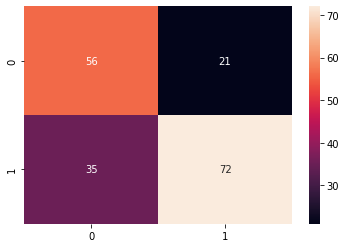

In [95]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [96]:
from sklearn.metrics import precision_score

In [97]:
precision = precision_score(Y_test, y_pred_knn)

In [98]:
print("Precision: ",precision)

Precision:  0.7741935483870968


# recall

In [99]:
from sklearn.metrics import recall_score

In [100]:
recall = recall_score(Y_test, y_pred_knn)

In [101]:
print("Recall is: ",recall)

Recall is:  0.6728971962616822


# f score

In [102]:
print((2*precision*recall)/(precision+recall))

0.7200000000000001


### bad cm

In [103]:
CM = pd.crosstab(Y_test, y_pred_knn)
CM

col_0,0,1
target,,
0,56,21
1,35,72


In [104]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [105]:
fnr = FN*100/(FN+TP)
fnr

32.71028037383178

## false negative rate

In [106]:
CM = pd.crosstab(Y_test, y_pred_knn)
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

32.71028037383178

# Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1
 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1]


In [108]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 82.61 %


In [109]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.739


In [110]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.868
Accuracy on test set: 0.826


# Discision Tree Visualization

In [111]:
df = pd.read_csv('1_Preprocessed_Dataset.csv')

In [112]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [113]:
from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing

In [114]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,    
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [115]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

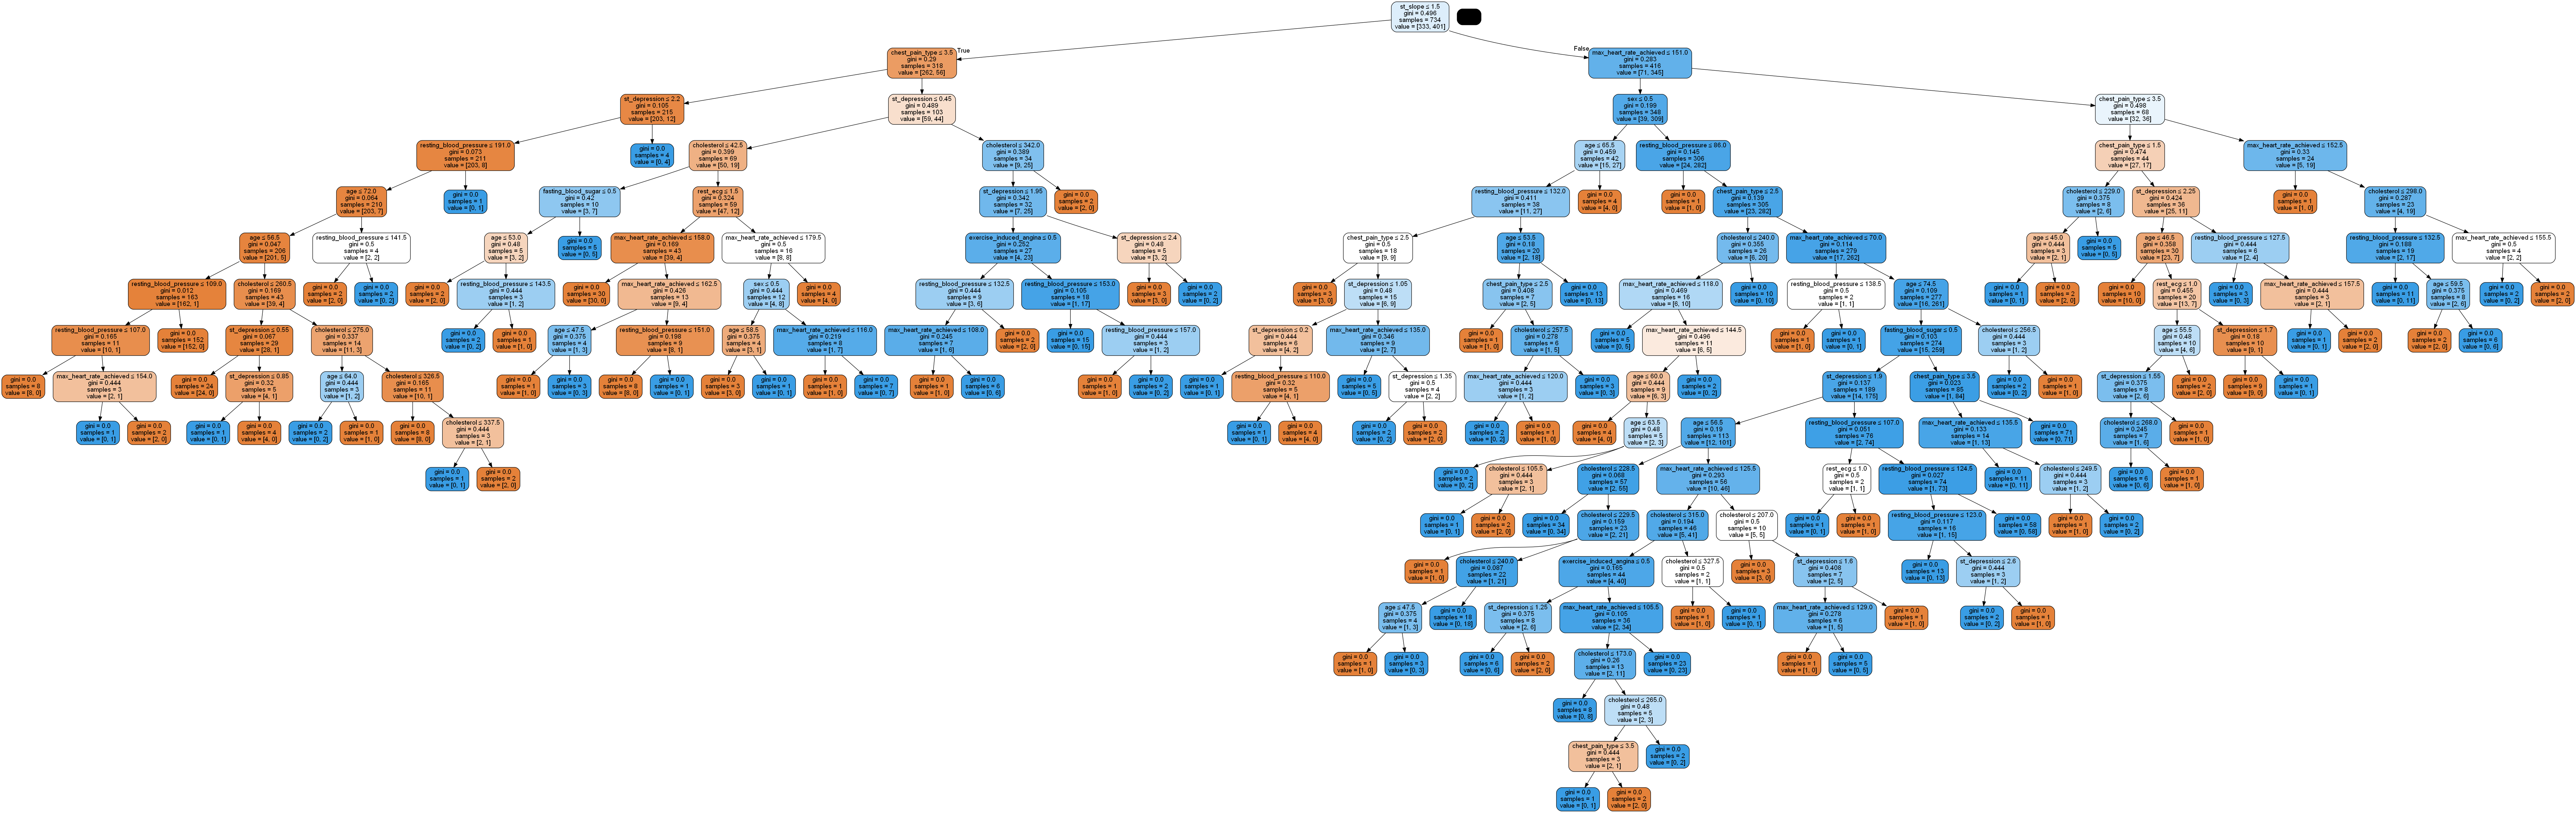

In [116]:
plot_decision_tree(clf, X_train.columns,df.columns[1])

# Depth 1

In [117]:
from sklearn import tree
HOW_DEEP_TREES = 1
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=HOW_DEEP_TREES)
clf = clf.fit(X_train, Y_train)
clf

DecisionTreeClassifier(max_depth=1, random_state=0)

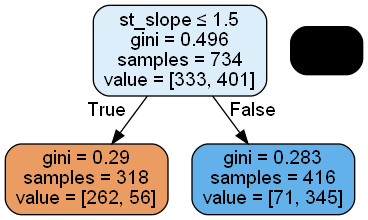

In [118]:
plot_decision_tree(clf, X_train.columns,df.columns[1])

## Confusion Matrix

In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
matrix= confusion_matrix(Y_test, y_pred_dt)

<AxesSubplot:>

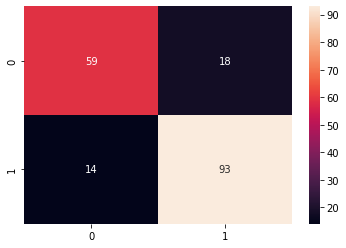

In [121]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [122]:
from sklearn.metrics import precision_score

In [123]:
precision = precision_score(Y_test, y_pred_dt)

In [124]:
print("Precision: ",precision)

Precision:  0.8378378378378378


# recall

In [125]:
from sklearn.metrics import recall_score

In [126]:
recall = recall_score(Y_test, y_pred_dt)

In [127]:
print("Recall is: ",recall)

Recall is:  0.8691588785046729


# f score

In [128]:
print((2*precision*recall)/(precision+recall))

0.8532110091743118


### bad cm style

In [129]:
CM = pd.crosstab(Y_test, y_pred_dt)
CM

col_0,0,1
target,,
0,59,18
1,14,93


## false negative rate

In [130]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

13.08411214953271

# FINAL SCORE

In [131]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(), 
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)

In [132]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.695652
Decision Trees,0.826087
Logistic Regression,0.831522
Naive Bayes,0.831522
Random Forests,0.842391
